In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-drug-data/data_drug_persistence.csv
/kaggle/input/drug-persistence-healthcare/Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.style.use('ggplot')  # optional: for ggplot-like style

In [3]:
df = pd.read_csv('../input/healthcare-drug-data/data_drug_persistence.csv')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.shape

(3424, 69)

In [5]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [6]:
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

We have a data set that contains 2135 Non-Persistent and 1289 persistent outcomes

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Ptid,0,0.0
Concom_Cephalosporins,0,0.0
Risk_Osteogenesis_Imperfecta,0,0.0
Risk_Type_1_Insulin_Dependent_Diabetes,0,0.0
Concom_Viral_Vaccines,0,0.0
Concom_Anaesthetics_General,0,0.0
Concom_Broad_Spectrum_Penicillins,0,0.0
Concom_Macrolides_And_Similar_Types,0,0.0
Concom_Fluoroquinolones,0,0.0
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,0,0.0


In [8]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

It is evident that there are no missing values in the given data set. Great sign!!
Let us go ahead and explore the data further

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    ------------------------------------------------------------
                                           Total:         287 KB

The following packages will be SUPERSEDED b

In [10]:
df['Age_Bucket'].unique()

array(['>75', '55-65', '65-75', '<55'], dtype=object)

The variable "Age-Bucket" has been stored as object type variable and the values ">75","65-75" cannot be amenable to mathematical modelling. So let us convert the values in Age_Bucket column to reflect the nature of their values as shown below that is the highesr age bucket will have higher value that respresents the age in the scale of 1-10 as shown below. 

In [11]:
mapper = {'>75': 8, '65-75': 7, '55-65':6, '<55': 5}
df['Age_Bucket'] = df['Age_Bucket'].map(mapper)
df['Age_Bucket'].unique()


array([8, 6, 7, 5])

Similarly, we will go ahead and modify the values for the variables '**Tscore_Bucket_Prior_Ntm**' and '**Tscore_Bucket_During_Rx**'

In [12]:
df['Tscore_Bucket_Prior_Ntm'].unique()

array(['>-2.5', '<=-2.5'], dtype=object)

In [13]:
df['Tscore_Bucket_Prior_Ntm'].replace(to_replace=['>-2.5', '<=-2.5'], value=[1,0],inplace=True)
df['Tscore_Bucket_During_Rx'].replace(to_replace=['>-2.5', '<=-2.5'], value=[1,0],inplace=True)

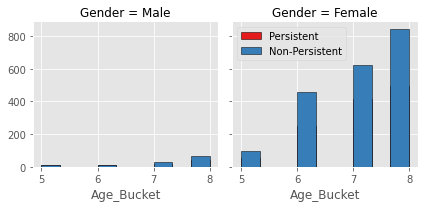

In [14]:
import seaborn as sns

bins = np.linspace(df.Age_Bucket.min(), df.Age_Bucket.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Persistency_Flag", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age_Bucket', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [15]:
df.groupby(['Gender'])['Persistency_Flag'].value_counts(normalize=True)

Gender  Persistency_Flag
Female  Non-Persistent      0.624768
        Persistent          0.375232
Male    Non-Persistent      0.603093
        Persistent          0.396907
Name: Persistency_Flag, dtype: float64

62% of females are persistent while, 60 % of males are persistent. Not a significant difference.

In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,8,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,6,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,7,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,8,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,8,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


Let us remove the column 'Ptid' since we donot want to consider it for our modeling purpose and also store our response variable in seperate array.  

In [17]:
y=df['Persistency_Flag']
df.drop(columns=['Persistency_Flag','Ptid'], inplace= True)

Let us proceed with one hot encoding for categorical features

In [18]:
categorical_feats = df.dtypes[df.dtypes == "object"].index
categorical_feats

Index(['Gender', 'Race', 'Ethnicity', 'Region', 'Ntm_Speciality',
       'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Dens

In [19]:
Feature = pd.get_dummies(df)
Feature.shape

(3424, 177)

In [20]:
X = Feature
X[0:5]

,Age_Bucket,Dexa_Freq_During_Rx,Tscore_Bucket_Prior_Ntm,Count_Of_Risks,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,...,Risk_Excessive_Thinness_N,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_N,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_N,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_N,Risk_Immobilization_Y,Risk_Recurring_Falls_N,Risk_Recurring_Falls_Y
0,8,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,6,0,1,0,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,7,0,0,2,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,8,0,1,1,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,8,0,0,1,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


**Response variable snap shot**

In [21]:
y[0:5]

0        Persistent
1    Non-Persistent
2    Non-Persistent
3    Non-Persistent
4    Non-Persistent
Name: Persistency_Flag, dtype: object

Now we are ready with the Features(Predictors) and response variables. Let us proceed with data normalization.

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.98589469, -0.3707352 ,  0.86890589, -1.13220443, -4.08037799,
         4.08037799, -0.16892927, -0.15858657,  0.29609916, -0.17074951,
        -0.1716532 ,  0.24170952, -0.16523538, -0.8231701 , -0.26959545,
        -0.13355115, -0.75683989,  2.41261624, -0.08041632, -0.01709214,
        -0.01709214, -0.39295893, -0.02417547,  1.10933263, -0.02417547,
        -0.06407474, -0.02417547, -0.01709214, -0.02961311, -0.01709214,
        -0.01709214, -0.01709214, -0.16430034, -0.01709214, -0.26520648,
        -0.01709214, -0.09401664, -0.02961311, -0.06407474, -0.01709214,
        -0.06851887, -0.06173491, -0.05677122, -0.02417547, -0.01709214,
        -0.03419928, -0.04839339, -0.01709214, -0.4628006 , -0.04839339,
        -0.02417547, -0.09864909, -0.31551611, -0.02417547,  0.8372239 ,
        -0.8372239 , -0.51420013,  0.79207097, -0.4628006 ,  0.5544089 ,
        -0.5544089 ,  0.59804068, -0.59804068,  0.61335617, -0.61335617,
         0.43840684, -0.43840684,  0.37239283, -0.3

We are ready to model our data. We will try different classification models strating with **K-Nearest Neighbor(KNN)**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2739, 177) (2739,)
Test set: (685, 177) (685,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k =7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7959109163928441
Test set Accuracy:  0.7124087591240876


In [26]:
neigh.predict(X_train)

array(['Non-Persistent', 'Non-Persistent', 'Non-Persistent', ...,
       'Non-Persistent', 'Non-Persistent', 'Persistent'], dtype=object)

In [27]:
from sklearn.tree import DecisionTreeClassifier
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhaef67bd_5          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhaef67bd_5

The following packages will be UPDATED:

In [28]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
X_train.shape


(2739, 177)

In [29]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, drugTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, drugTree.predict(X_test)))

Train set Accuracy:  0.8714859437751004
Test set Accuracy:  0.7562043795620438


In [30]:
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
y_test

993     Non-Persistent
3095        Persistent
2447        Persistent
1655        Persistent
809         Persistent
             ...      
299     Non-Persistent
2035    Non-Persistent
135     Non-Persistent
361     Non-Persistent
2970    Non-Persistent
Name: Persistency_Flag, Length: 685, dtype: object

In [31]:
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)



In [32]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8320554947060971
Test set Accuracy:  0.7927007299270074


In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,yhat)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[349  56]
 [ 86 194]]


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
### applying knn modekl
yhat=neigh.predict(X_test)
yhat_js =np.where(yhat == 'Non-Persistent', 0, 1)
ytest_js =np.where(y_test == 'Non-Persistent', 0, 1)
print('For Knn:                 jaccard score ',jaccard_score(ytest_js, yhat_js,pos_label=0),'  F-1 score ',f1_score(y_test, yhat, average='weighted') )
### applying decision trees
yhat = drugTree.predict(X_test)
yhat_js =np.where(yhat == 'Non-Persistent', 0, 1)
print('For decision trees:      jaccard score ',jaccard_score(ytest_js, yhat_js,pos_label=0),'  F-1 score ',f1_score(y_test, yhat, average='weighted') )
### applying logistic regression
yhat = LR.predict(X_test)
yhat_js =np.where(yhat == 'Non-Persistent', 0, 1)
yhat_prob = LR.predict_proba(X_test)
print('For logistic regression: jaccard score ',jaccard_score(ytest_js, yhat_js,pos_label=0),'  F-1 score ',f1_score(y_test, yhat, average='weighted'))

For Knn:                 jaccard score  0.6591695501730104   F-1 score  0.6826200244070136
For decision trees:      jaccard score  0.6800766283524904   F-1 score  0.7489507492361961
For logistic regression: jaccard score  0.7107942973523421   F-1 score  0.7905355421331183
